## SUPERPOSITION

In [1]:
from dotenv import dotenv_values

dotenv_data = dotenv_values('.env')
token = dotenv_data.get('IBM_TOKEN')

from qiskit_ibm_provider import IBMProvider

try:
    provider = IBMProvider(token=token)
    print("Successfully authenticated with IBM Quantum.")
except Exception as e:
    print("Error:", e)

Successfully authenticated with IBM Quantum.


Quantum Circuit:


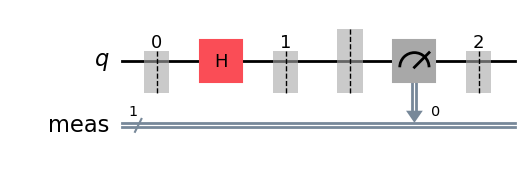

In [40]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

qc = QuantumCircuit(1)
qc.save_statevector('0')
qc.h(0)
qc.save_statevector('1')
qc.measure_all()
qc.save_statevector('2')

print("Quantum Circuit:")
qc.draw("mpl")

In [41]:
aersim = AerSimulator()
result_ideal = aersim.run(qc, shots=500).result()
data = result_ideal.get_counts(qc)

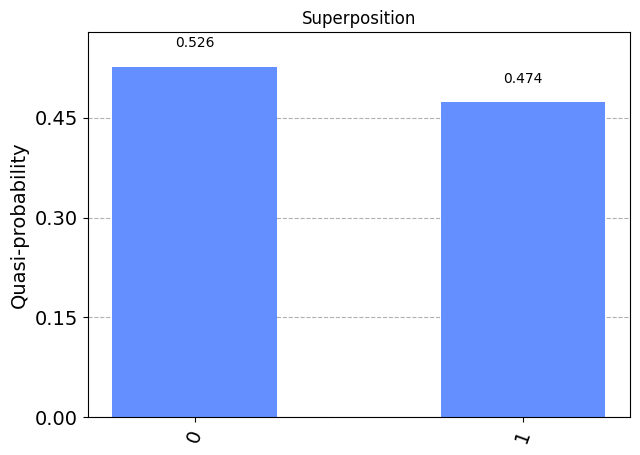

In [42]:
from qiskit.visualization import plot_histogram

total_counts = sum(data.values())
probabilities = {key: value / total_counts for key, value in data.items()}

plot_histogram(probabilities, title='Superposition')

In [43]:
test = result_ideal.data()
psi1 = test['0']
psi2 = test['1']
psi3 = test['2']
psi1.draw(output = 'latex')

<IPython.core.display.Latex object>

In [44]:
psi2.draw(output = 'latex')

<IPython.core.display.Latex object>

In [45]:
psi3.draw(output = 'latex')

<IPython.core.display.Latex object>

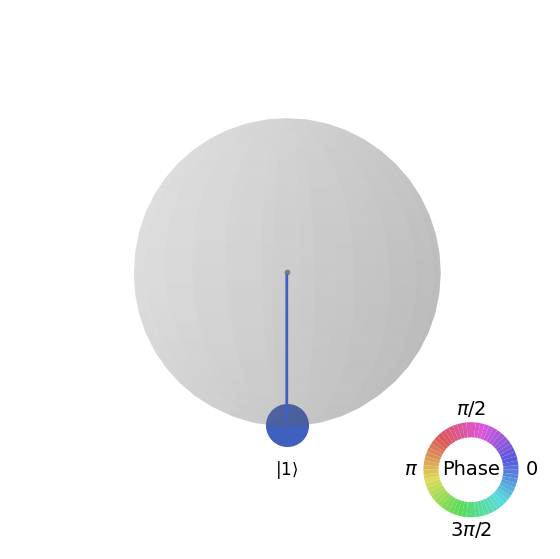

In [47]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(psi3)